In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc, RocCurveDisplay, PrecisionRecallDisplay, recall_score, precision_score, f1_score, classification_report
import pandas as pd
from seaborn import heatmap
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
figsize = (8, 7)
fontsize=14

# Golem Bootcamp 2022 - Klasyfikacja
*08.11.2022*

## Zadanie klasyfikacji
**Klasyfikator** na podstawie danych wejściowych (cech) ma za zadanie przewidzieć `dyskretną etykietę` lub `prawdopodobieństwo` tego, że przykład należy do danej klasy. Jest on trenowany na opisanych danych (**Uczenie nadzorowane**). \
**Klasyfikacja** - Problem przypisania obserwacji do klasy do której należy z największym prawdopodobieństwem na podstawie modelu klasyfikacji.   

## Tzw top-down approach
No to wytrenujmy coś :)

### Zbiór danych
![](./imgs/iris-machinelearning.png)

In [3]:
iris = load_iris()

In [4]:
 print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [8]:
np.unique(y_train)

array([0, 1, 2])

In [9]:
log_reg = LogisticRegression(max_iter=2000)

In [10]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [11]:
test_preds = log_reg.predict(X_test)

In [70]:
test_preds[0]

1

In [13]:
log_reg.predict_proba(X_test)[0]

array([0.00378334, 0.8271855 , 0.16903115])

In [14]:
y_test[0]

1

print(f"Accuracy: {accuracy_score(test_preds, y_test)}")

Nice:)

## Typy klasyfikacji
1. Klasyfikacja binarna (Binary Classification)
2. Klasyfikacja wieloklasowa (Multiclass Classification)
3. Klasyfikacja wieloetykietowa (Multi-Label Classification)

![](./imgs/classification_types.png)

## Regresja logistyczna
http://ufldl.stanford.edu/tutorial/supervised/LogisticRegression/ \
Modyfikacja regresji liniowej, która zawsze zwraca prawdopodobieństwo z przedziału $[0, 1]$ poprzez zastosowanie **funkcji sigmoidalnej**.

### Regresja liniowa - przypomnienie
$$
f(x) = \beta_0 + \beta_1x
$$

W ogólności przyjmując za $\theta$ wektor parametrów modelu:
$$
f_\theta(x) = \theta^{T}x
$$

In [15]:
def linear(x):
    return 2*x + 1

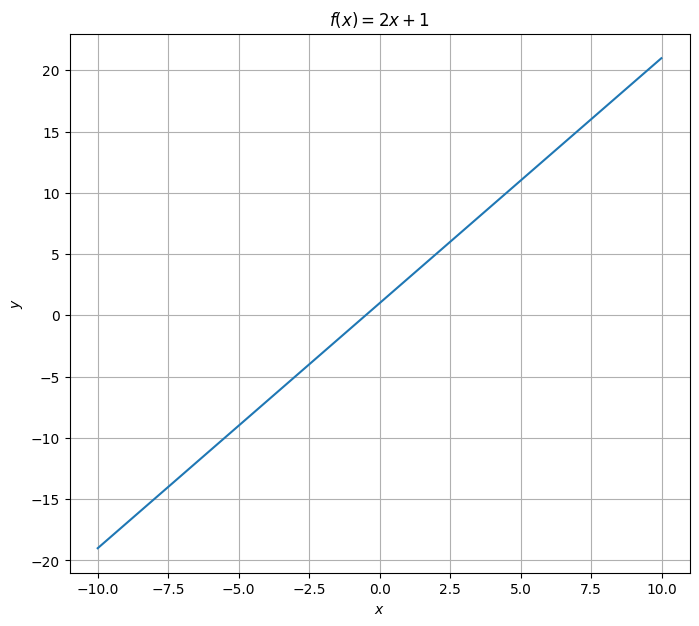

In [16]:
x = np.arange(-10, 10, .01)
plt.figure(figsize=figsize)
plt.plot(x, linear(x))
plt.title(r'$f(x) = 2x+1$')
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

### Funkcja sigmoidalna (sigmoida)

$$
S(x) = \frac{1}{1 + e^{-x}} =  \frac{e^{x}}{e^{x} + 1}
$$

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

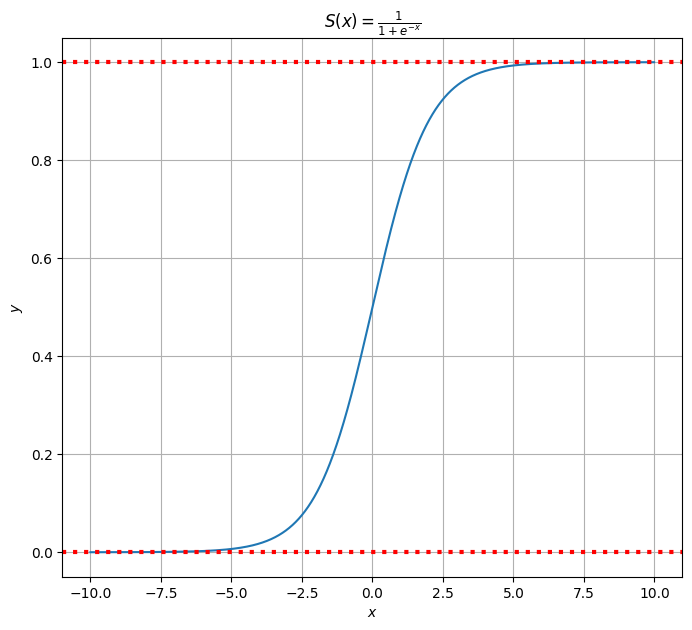

In [18]:
plt.figure(figsize=figsize)
plt.plot(x, sigmoid(x))
plt.title(r'$S(x) = \frac{1}{1 + e^{-x}}$')
plt.axhline(1.0, linestyle=":",color='r', label='threshold', linewidth=3)
plt.axhline(0.0, linestyle=":",color='r', label='threshold', linewidth=3)
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

### Jak przejść z regresji liniowej do regresji logistycznej?
$$
P(y=1|x) = S(f_\theta(x)) = \frac{1}{1 + e^{-f_\theta(x)}} =  \frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}
$$

W ogólności:

$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^{T}x}} \equiv \sigma(\theta^{T}x)
$$

### Do klasyfikacji potrzebujemy próg odcięcia

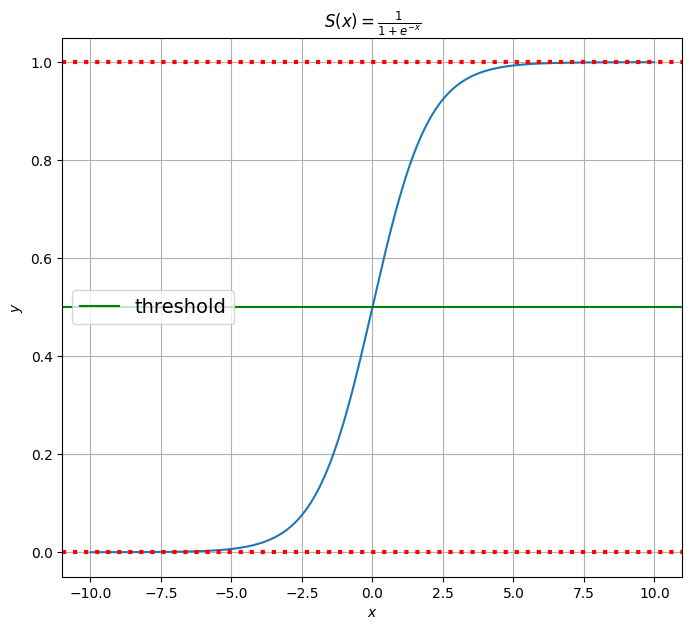

In [19]:
threshold = 0.5
plt.figure(figsize=figsize)
plt.plot(x, sigmoid(x))
plt.axhline(threshold, color='g', label='threshold')
plt.title(r'$S(x) = \frac{1}{1 + e^{-x}}$')
plt.axhline(1.0, linestyle=":",color='r', linewidth=3)
plt.axhline(0.0, linestyle=":",color='r', linewidth=3)
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(loc="center left",fontsize=fontsize)
plt.show()

### Jak znaleźć najlepsze wartości parametrów regresji logistycznej?
Chcemy znaleźć taki wektor parametrów $\theta$, że $P(y=1|x)$ jest duże, gdy $x$ należy do klasy 1, a małe w przeciwnym przypadku.

#### Funkcja kosztu

Funkcja kosztu dla pojedynczej próbki:
$$
l(\theta)= 
\begin{cases}
    -\log(p),& \text{jeśli } y = 1\\
    -\log(1-p),& \text{jeśli } y = 0
\end{cases}
$$

In [20]:
def log(x):
    return np.log(x)

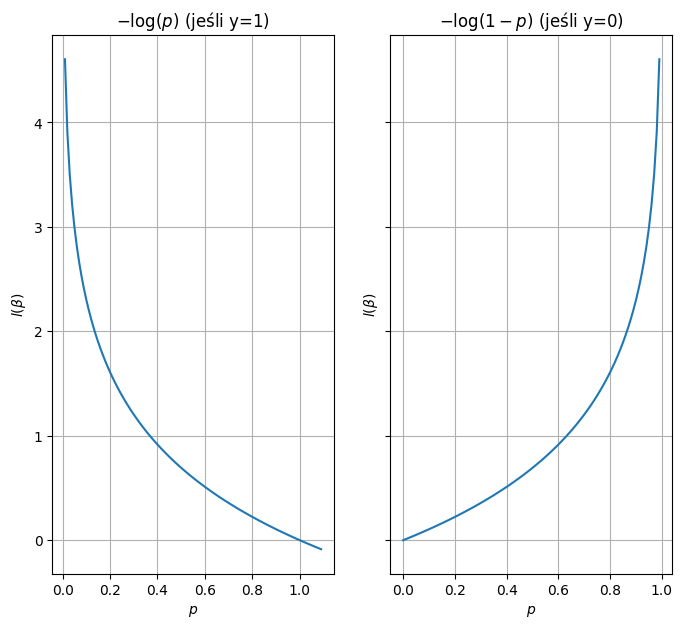

In [21]:
x = np.arange(0, 1.1, .01)
fig, ax = plt.subplots(1, 2, sharey=True, figsize=figsize)
ax[0].plot(x, -log(x))
ax[0].set_title(r'$-\log(p)$ (jeśli y=1)')
ax[0].set_xlabel(r'$p$')
ax[0].set_ylabel(r'$l(\beta)$')
ax[0].grid()

ax[1].plot(x, -log(1-x))
ax[1].set_title(r'$-\log(1-p)$ (jeśli y=0)')
ax[1].set_xlabel(r'$p$')
ax[1].set_ylabel(r'$l(\beta)$')
ax[1].grid()

plt.show()

**Cross entropy loss** (log-loss)
$$
J(\theta) = -\sum_{i}\bigl[y^{(i)}\log(h_\theta(x^{(i)})) + (1-y^{(i)})\log(1-h_\theta(x^{(i)}))\bigr]
$$

Następnie optymalizacja parametrów **spadkiem gradientu** (gradient descent) - analogicznie jak w regresji liniowej.

## Klasyfikacja binarna

In [22]:
X_train_bin = X_train[:, 3:]  # petal width
X_test_bin = X_test[:, 3:]  # petal width
y_train_bin = (y_train == 2).astype(np.int32) # 1 if Iris virginica, else 0
y_test_bin = (y_test == 2).astype(np.int32) # 1 if Iris virginica, else 0

In [23]:
X_train_bin.shape

(120, 1)

In [24]:
np.unique(y_train_bin)

array([0, 1])

In [25]:
log_reg = LogisticRegression()

In [26]:
log_reg.fit(X_train_bin, y_train_bin)

LogisticRegression()

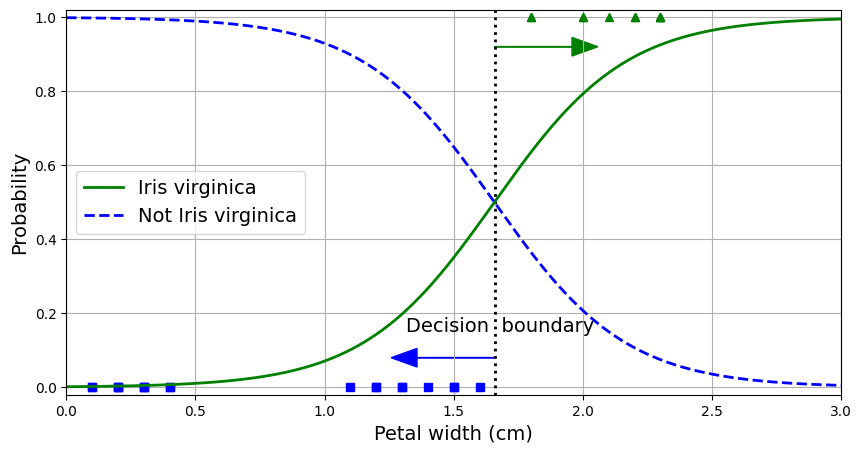

In [27]:
# credit: https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(10, 5))
plt.plot(X_test_bin[y_test_bin==0], y_test_bin[y_test_bin==0], "bs")
plt.plot(X_test_bin[y_test_bin==1], y_test_bin[y_test_bin==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=fontsize, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=fontsize)
plt.ylabel("Probability", fontsize=fontsize)
plt.legend(loc="center left", fontsize=fontsize)
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
plt.show()

In [28]:
print(f"Accuracy: {accuracy_score(log_reg.predict(X_test_bin), y_test_bin)}")

Accuracy: 1.0


In [29]:
decision_boundary

array([1.65765766])

In [30]:
log_reg.predict([[3]])

array([1])

## Klasyfikacja wieloklasowa
Jak dla regresji logistycznej przejść z klasyfikacji binarnej na klasyfikację wieloklasową?
http://deeplearning.stanford.edu/tutorial/supervised/SoftmaxRegression/

Tym razem dla próbki danych $x$ chcemy estymować prawdopodobieństwo $P(y=k|x)$ dla każdej możliwej klasy $k$. Dlatego teraz nasz model będzie zwracał $K$-wymiarowy wektor, którego elementy będą sumowały się do 1.

### Softmax
$$
softmax(x) = \frac{e^{x_i}}{\sum_{j=1}^{K}e^{x_j}} 
$$

### Softmax Regression
$$
g_\theta(x) = \frac{1}{\sum_{j=1}^{K}e^{\theta^{(j)T}x}}
\begin{bmatrix}
e^{\theta^{(1)T}x} \\
e^{\theta^{(2)T}x} \\
\vdots \\
e^{\theta^{(K)T}x}
\end{bmatrix}
$$

### Funkcja straty
Uogólnienie poprzedniej dla wielu klas
$$
J(\theta) = -\Bigl[\sum_{i}\sum_{k}^{K}y^{(i)}\log\frac{e^{\theta^{(k)T}x^{(i)}}}{\sum^{K}_{j=1}e^{\theta^{(j)T}x^{(i)}}} \Bigr]
$$

In [31]:
X_train_mult = X_train[:, (2, 3)]  # petal length, petal width
y_train_mult = y_train # this time we are taking every class
X_test_mult = X_test[:, (2, 3)]
y_test_mult = y_test

In [32]:
np.unique(y_train_mult)

array([0, 1, 2])

In [33]:
softmax_reg = LogisticRegression(multi_class="multinomial", random_state=42)
softmax_reg.fit(X_train_mult, y_train_mult)

LogisticRegression(multi_class='multinomial', random_state=42)

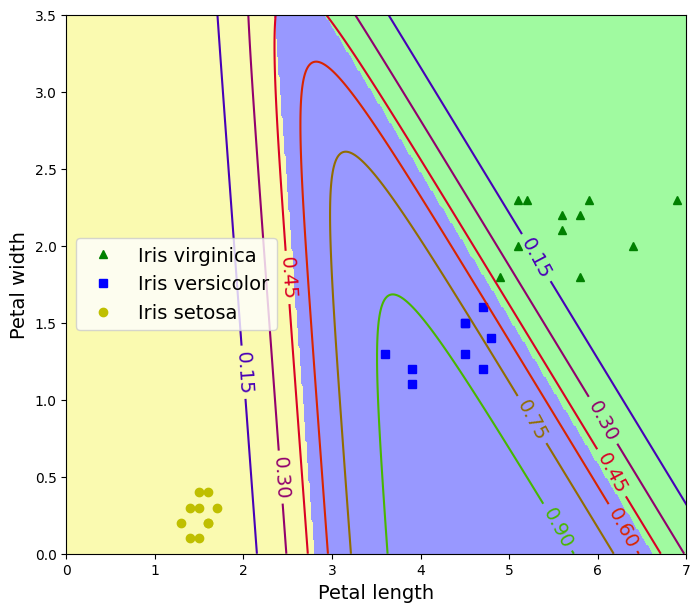

In [34]:
# credit: https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape) # probabilities curves for k class
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=figsize)
plt.plot(X_test_mult[y_test_mult==2, 0], X_test_mult[y_test_mult==2, 1], "g^", label="Iris virginica")
plt.plot(X_test_mult[y_test_mult==1, 0], X_test_mult[y_test_mult==1, 1], "bs", label="Iris versicolor")
plt.plot(X_test_mult[y_test_mult==0, 0], X_test_mult[y_test_mult==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=fontsize)
plt.xlabel("Petal length", fontsize=fontsize)
plt.ylabel("Petal width", fontsize=fontsize)
plt.legend(loc="center left", fontsize=fontsize)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [35]:
iris.target_names[softmax_reg.predict([[4, 0.5]])]

array(['versicolor'], dtype='<U10')

## Metryki

Inny dataset - **breast cancer wisconsin dataset** 

In [36]:
breast_cancer = load_breast_cancer()

In [37]:
# make dataset umbalanced
zipped = zip(breast_cancer.data, breast_cancer.target)
y = []
X = []
ones_count = 30
# only zeros
for data, label in zipped:
    if not label:
        X.append(data)
        y.append(label)
    else:
        if ones_count:
            X.append(data)
            y.append(label)
            ones_count -= 1
X = np.array(X)
y = np.array(y)

In [38]:
class CoolModel():
    def __init__(self):
        pass
    
    def fit(self, x, y):
        pass
    
    def predict(self, x):
        return [0 for _ in range(len(x))]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((193, 30), (49, 30))

In [40]:
model = CoolModel()
model.fit(X_train, y_train)

In [41]:
preds = model.predict(X_test)

### Typy predykcji
**TP** - True Positives -> poprawnie sklasyfikowane jako pozytywne \
**FP** - False Positives -> błędnie sklasyfikowane jako pozytywne \
**TN** - True Negatives -> poprawnie sklasyfikowane jako negatywne \
**FN** - False Negatives -> błędnie sklasyfikowane jako negatywne

### Confusion Matrix

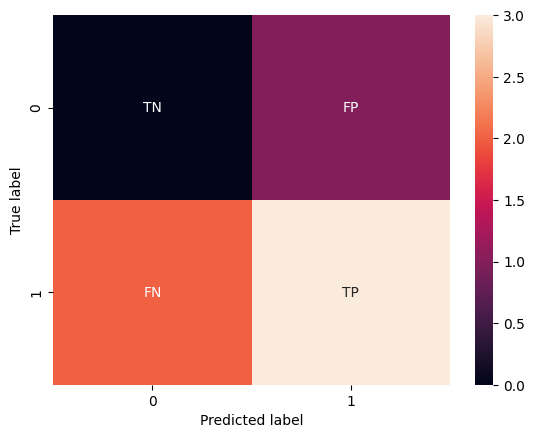

In [42]:
heatmap([[0, 1], [2, 3]], annot=[['TN', 'FP'], ['FN', 'TP']], fmt='')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show() 

In [43]:
cm = confusion_matrix(y_test, preds)

### Accuracy
$$
\text{Accuracy} = \frac{TP + TN}{TP+FP+TN+FN}
$$

In [44]:
def accuracy(cm):
    return (cm[1,1]+cm[0,0]) / (cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])

In [45]:
print(f"Accuracy: {accuracy(cm):.2f}")

Accuracy: 0.92


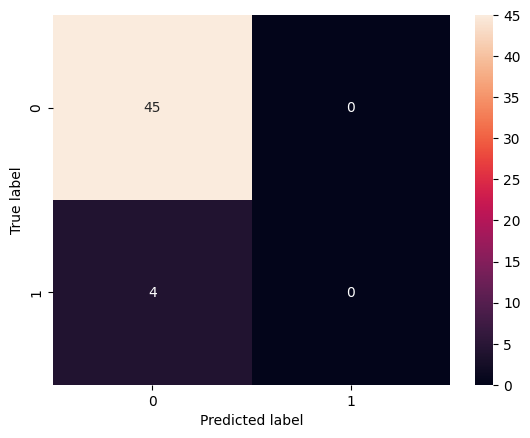

In [46]:
heatmap(cm, annot=True, fmt='')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

```python
class CoolModel():
    def __init__(self):
        pass
    
    def fit(self, x, y):
        pass
    
    def predict(self, x):
        return [0 for _ in range(len(x))]
```

## Problem niezbilansowanych danych
Znaczna różnica w liczności poszczególnych klas - accuracy nie sprawdza się, potrzebujemy lepszych metryk.

## Lepsze metryki

### Precision
$$
\text{Precision} = \frac{TP}{TP+FP}
$$

In [47]:
def precision(cm):
    if not (cm[1,1]+cm[0,1]):
        return 0
    return cm[1,1] / (cm[1,1]+cm[0,1])

In [48]:
print(f"Precision: {precision(cm):.2f}")

Precision: 0.00


### Recall
$$
\text{Recall} = \frac{TP}{TP+FN}
$$

In [49]:
def recall(cm):
    if not (cm[1,1]+cm[1,0]):
        return 0
    return cm[1,1] / (cm[1,1]+cm[1,0])

In [50]:
print(f"Recall: {recall(cm):.2f}")

Recall: 0.00


In [51]:
# przykładzik
GT = [0, 0, 1, 1, 0, 1, 1, 1, 1, 0]
PR = [1, 1, 1, 1, 0, 1, 1, 1, 1, 0]

In [52]:
CM_EX = confusion_matrix(GT, PR)

In [53]:
accuracy(CM_EX)

0.8

In [54]:
precision(CM_EX)

0.75

In [55]:
recall(CM_EX)

1.0

### Precision-recall tradeoff
Wraz ze wzrostem jednej z metryk, spada wartość drugiej

https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall

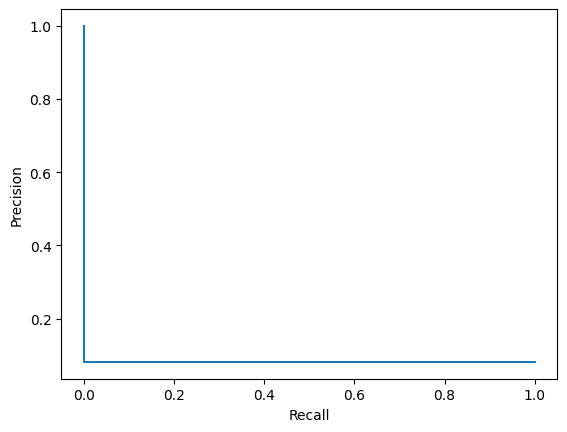

In [56]:
prec, rec, _ = precision_recall_curve(y_test, preds)
disp = PrecisionRecallDisplay(precision=prec, recall=rec)
disp.plot()
plt.show()

### F1
Średnia harmoniczna precision i recalla.
$$
\text{F1 Score} = \frac{2*\text{Precision}*\text{Recall}}{\text{Precision}+\text{Recall}}
$$

In [57]:
def f1(cm):
    prec = precision(cm)
    rec = recall(cm)
    if not (prec+rec):
        return 0
    return (2*prec*rec) / (prec+rec)

In [58]:
print(f"F1: {f1(cm):.2f}")

F1: 0.00


### ROC - receiver operating characteristic
Wykres pokazujący jak radzi sobie klasyfikator dla wszystkich thresholdów klasyfikacji.

$$
\text{TPR} = \frac{TP}{TP+FN} \
\text{FPR} = \frac{FP}{FP+TN}
$$

Aby wykreślić ROC:
1. Sortujemy według confidence score (według $P(1|x)$)
2. Obliczamy TPR i FPR dla każdego możliwego progu odcięcia

#### AUROC
Area Under the ROC Curve - im większe pole powierzchni pod krzywą, tym lepsza jakość klasyfikatora.

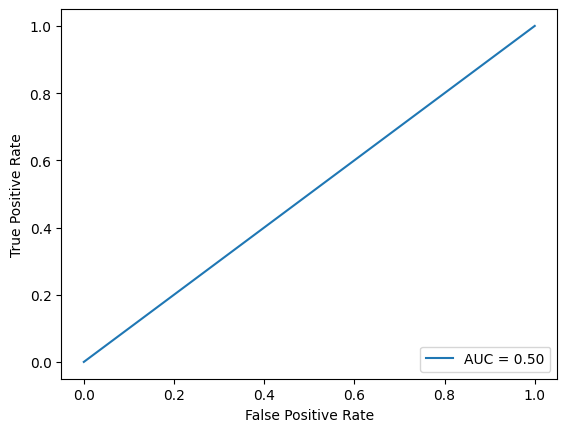

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

## Drzewo decyzyjne
Jeszcze raz wszystko od początku

In [60]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [61]:
clf = tree.DecisionTreeClassifier(max_depth=2)

In [62]:
clf = clf.fit(X_train, y_train)

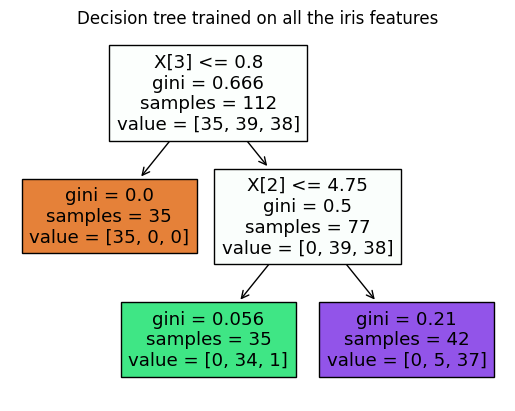

In [63]:
tree.plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

In [64]:
preds = clf.predict(X_test)

In [65]:
clf.predict([[0, 0, 4, 0]])

array([0])

In [66]:
cm = confusion_matrix(y_test, preds)

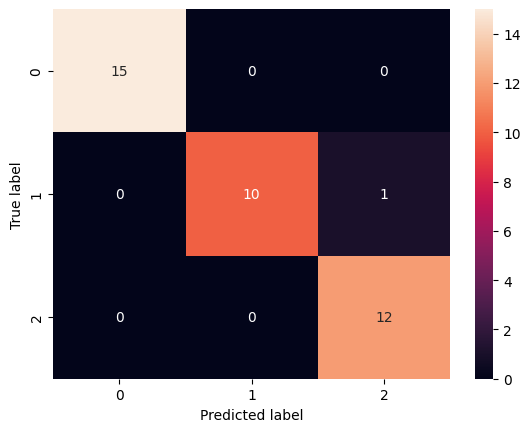

In [67]:
heatmap(cm, annot=True, fmt='')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [68]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [69]:
roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

0.9868557368557368